# Cluster mixes from your top listens!

## Import the Libraries

In [11]:
pip install spotipy


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached urllib3-1.26.8-py2.py3-none-any.whl (138 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring instal

In [2]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials,SpotifyOAuth
from spotipy import oauth2
import random
from functools import reduce



## Add your credentials

In [3]:
# Insert your Spotify username and the credentials that you obtained from spotify developer
username = 'bzo14hlkd2xdt5odh1fjzppnk'
secret = '3636899bdfa14aa1b01695e8fc77e4d2'
redirect_uri='http://localhost:4444/callback'
cid = 'fe12108a127f448391bb83acbc2f7d15'


In [4]:
# Once the Authorisation is complete, we just need to `sp` to call the APIs
scope = 'user-top-read'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=cid,
    client_secret=secret,
    redirect_uri=redirect_uri,    
    scope=scope,)
)


## Fetch your favourite songs
Now the API authnetication is complete, let's test it by getting users favourite songs

In [5]:
results = sp.current_user_top_tracks(limit=50,time_range='medium_term', offset=0)
results['items'][0]



{'album': {'album_type': 'ALBUM',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5cj0lLjcoR7YOSnhnX0Po5'},
    'href': 'https://api.spotify.com/v1/artists/5cj0lLjcoR7YOSnhnX0Po5',
    'id': '5cj0lLjcoR7YOSnhnX0Po5',
    'name': 'Doja Cat',
    'type': 'artist',
    'uri': 'spotify:artist:5cj0lLjcoR7YOSnhnX0Po5'}],
  'available_markets': ['AD',
   'AE',
   'AR',
   'AT',
   'AU',
   'BE',
   'BG',
   'BH',
   'BO',
   'BR',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HK',
   'HN',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IS',
   'IT',
   'JO',
   'JP',
   'KW',
   'LB',
   'LI',
   'LT',
   'LU',
   'LV',
   'MA',
   'MC',
   'MT',
   'MX',
   'MY',
   'NI',
   'NL',
   'NO',
   'NZ',
   'OM',
   'PA',
   'PE',
   'PH',
   'PL',
   'PS',
   'PT',
   'PY',
   'QA',
   'RO',
   'SA',
   'SE',
   'SG',
   'SK',
   

In [6]:
# Convert it to Dataframe
track_name = []
track_id = []
artist = []
album = []
duration = []
popularity = []
for i, items in enumerate(results['items']):
        track_name.append(items['name'])
        track_id.append(items['id'])
        artist.append(items["artists"][0]["name"])
        duration.append(items["duration_ms"])
        album.append(items["album"]["name"])
        popularity.append(items["popularity"])

# Create the final df   
df_favourite = pd.DataFrame({ "track_name": track_name, 
                             "album": album, 
                             "track_id": track_id,
                             "artist": artist, 
                             "duration": duration, 
                             "popularity": popularity})
df_favourite



,track_name,album,track_id,artist,duration,popularity
0,Woman,Planet Her,6Uj1ctrBOjOas8xZXGqKk4,Doja Cat,172626,95
1,Daisy,Daisy,0AUvWawuP0ibk4SQ3sIZjk,Ashnikko,146523,75
2,Buss It,Erica Banks,25j0Sape7qZbq6ZPLFefTT,Erica Banks,187000,71
3,do re mi,digital druglord,6Se3x9ANMLv0dCDsjGmEjh,blackbear,212027,76
4,Roshni,Roshni,4VDJJglEbqLva4mTz4ZnHV,Sickflip,174000,46
5,MORE,MORE,6juLaduD4STCUDWT0AYun4,K/DA,217088,76
6,She Doesn't Mind,Tomahawk Technique,4odiyU3myG29Ld0wurMfE8,Sean Paul,227786,74
7,TALES OF DOMINICA,MONTERO,5S4PZ7AuYlYiVIVik3wHUf,Lil Nas X,146005,73
8,Blueberry Faygo,Certified Hitmaker,22LAwLoDA5b4AaGSkg6bKW,Lil Mosey,162546,80
9,Don't Go Yet,Don't Go Yet,1058fW9H3fZA6QjYCdOBad,Camila Cabello,164842,86


In [7]:
def fetch_audio_features(sp, df):
    playlist = df[['track_id','track_name']] 
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    features_list = []
    # Create keys-values of empty lists inside nested dictionary for album
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['acousticness'],
                              features['energy'], 
                              features['tempo'],
                              features['instrumentalness'], 
                              features['loudness'],
                              features['liveness'],
                              features['duration_ms'],
                              features['key'],
                              features['valence'],
                              features['speechiness'],
                              features['mode']
                             ])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'acousticness', 'energy','tempo', 
                                                             'instrumentalness', 'loudness', 'liveness','duration_ms', 'key',
                                                             'valence', 'speechiness', 'mode'])
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_name', inplace=True, drop=True)
    return df_playlist_audio_features


In [8]:
df_favs = fetch_audio_features (sp, df_favourite)
df_favs


,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode
track_name,,,,,,,,,,,,,
Woman,6Uj1ctrBOjOas8xZXGqKk4,0.824,0.088800,0.764,107.998,0.002940,-4.175,0.1170,172627,5,0.8810,0.0854,0
Daisy,0AUvWawuP0ibk4SQ3sIZjk,0.834,0.235000,0.663,121.876,0.000000,-6.143,0.3720,146523,8,0.7740,0.1330,1
Buss It,25j0Sape7qZbq6ZPLFefTT,0.956,0.059300,0.502,110.003,0.000000,-5.995,0.2380,187000,9,0.7950,0.2130,1
do re mi,6Se3x9ANMLv0dCDsjGmEjh,0.745,0.005220,0.593,111.001,0.000005,-6.350,0.1230,212027,8,0.1700,0.0524,1
Roshni,4VDJJglEbqLva4mTz4ZnHV,0.566,0.629000,0.576,100.065,0.000000,-7.652,0.5340,174000,6,0.3000,0.1210,0
MORE,6juLaduD4STCUDWT0AYun4,0.660,0.002570,0.787,142.018,0.000000,-4.592,0.3230,217088,1,0.1990,0.0320,0
She Doesn't Mind,4odiyU3myG29Ld0wurMfE8,0.718,0.000624,0.776,120.015,0.000005,-5.208,0.2070,227787,7,0.6220,0.0693,0
TALES OF DOMINICA,5S4PZ7AuYlYiVIVik3wHUf,0.742,0.629000,0.734,114.952,0.003140,-5.582,0.0834,146006,8,0.5410,0.0407,0
Blueberry Faygo,22LAwLoDA5b4AaGSkg6bKW,0.774,0.207000,0.554,99.034,0.000000,-7.909,0.1320,162547,0,0.3490,0.0383,1


In [9]:
df_fav=df_favs.drop(["duration_ms","key","mode"], axis=1)


In [10]:
df_fav.describe()

,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,valence,speechiness
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.687360,0.189065,0.655400,121.865620,0.054371,-6.729380,0.192960,0.592470,0.080490
std,0.164667,0.210328,0.166773,24.626799,0.192389,2.661401,0.155779,0.244911,0.057222
min,0.273000,0.000624,0.225000,71.523000,0.000000,-16.994000,0.027200,0.059500,0.028200
25%,0.608250,0.023350,0.554250,102.459500,0.000000,-7.529500,0.093050,0.402000,0.038900
50%,0.710500,0.105000,0.665000,120.350500,0.000005,-6.377000,0.133500,0.622500,0.055700
75%,0.784250,0.312500,0.784250,136.349250,0.000687,-5.288500,0.230250,0.787250,0.103000
max,0.956000,0.767000,0.963000,195.018000,0.936000,-1.726000,0.790000,0.971000,0.247000


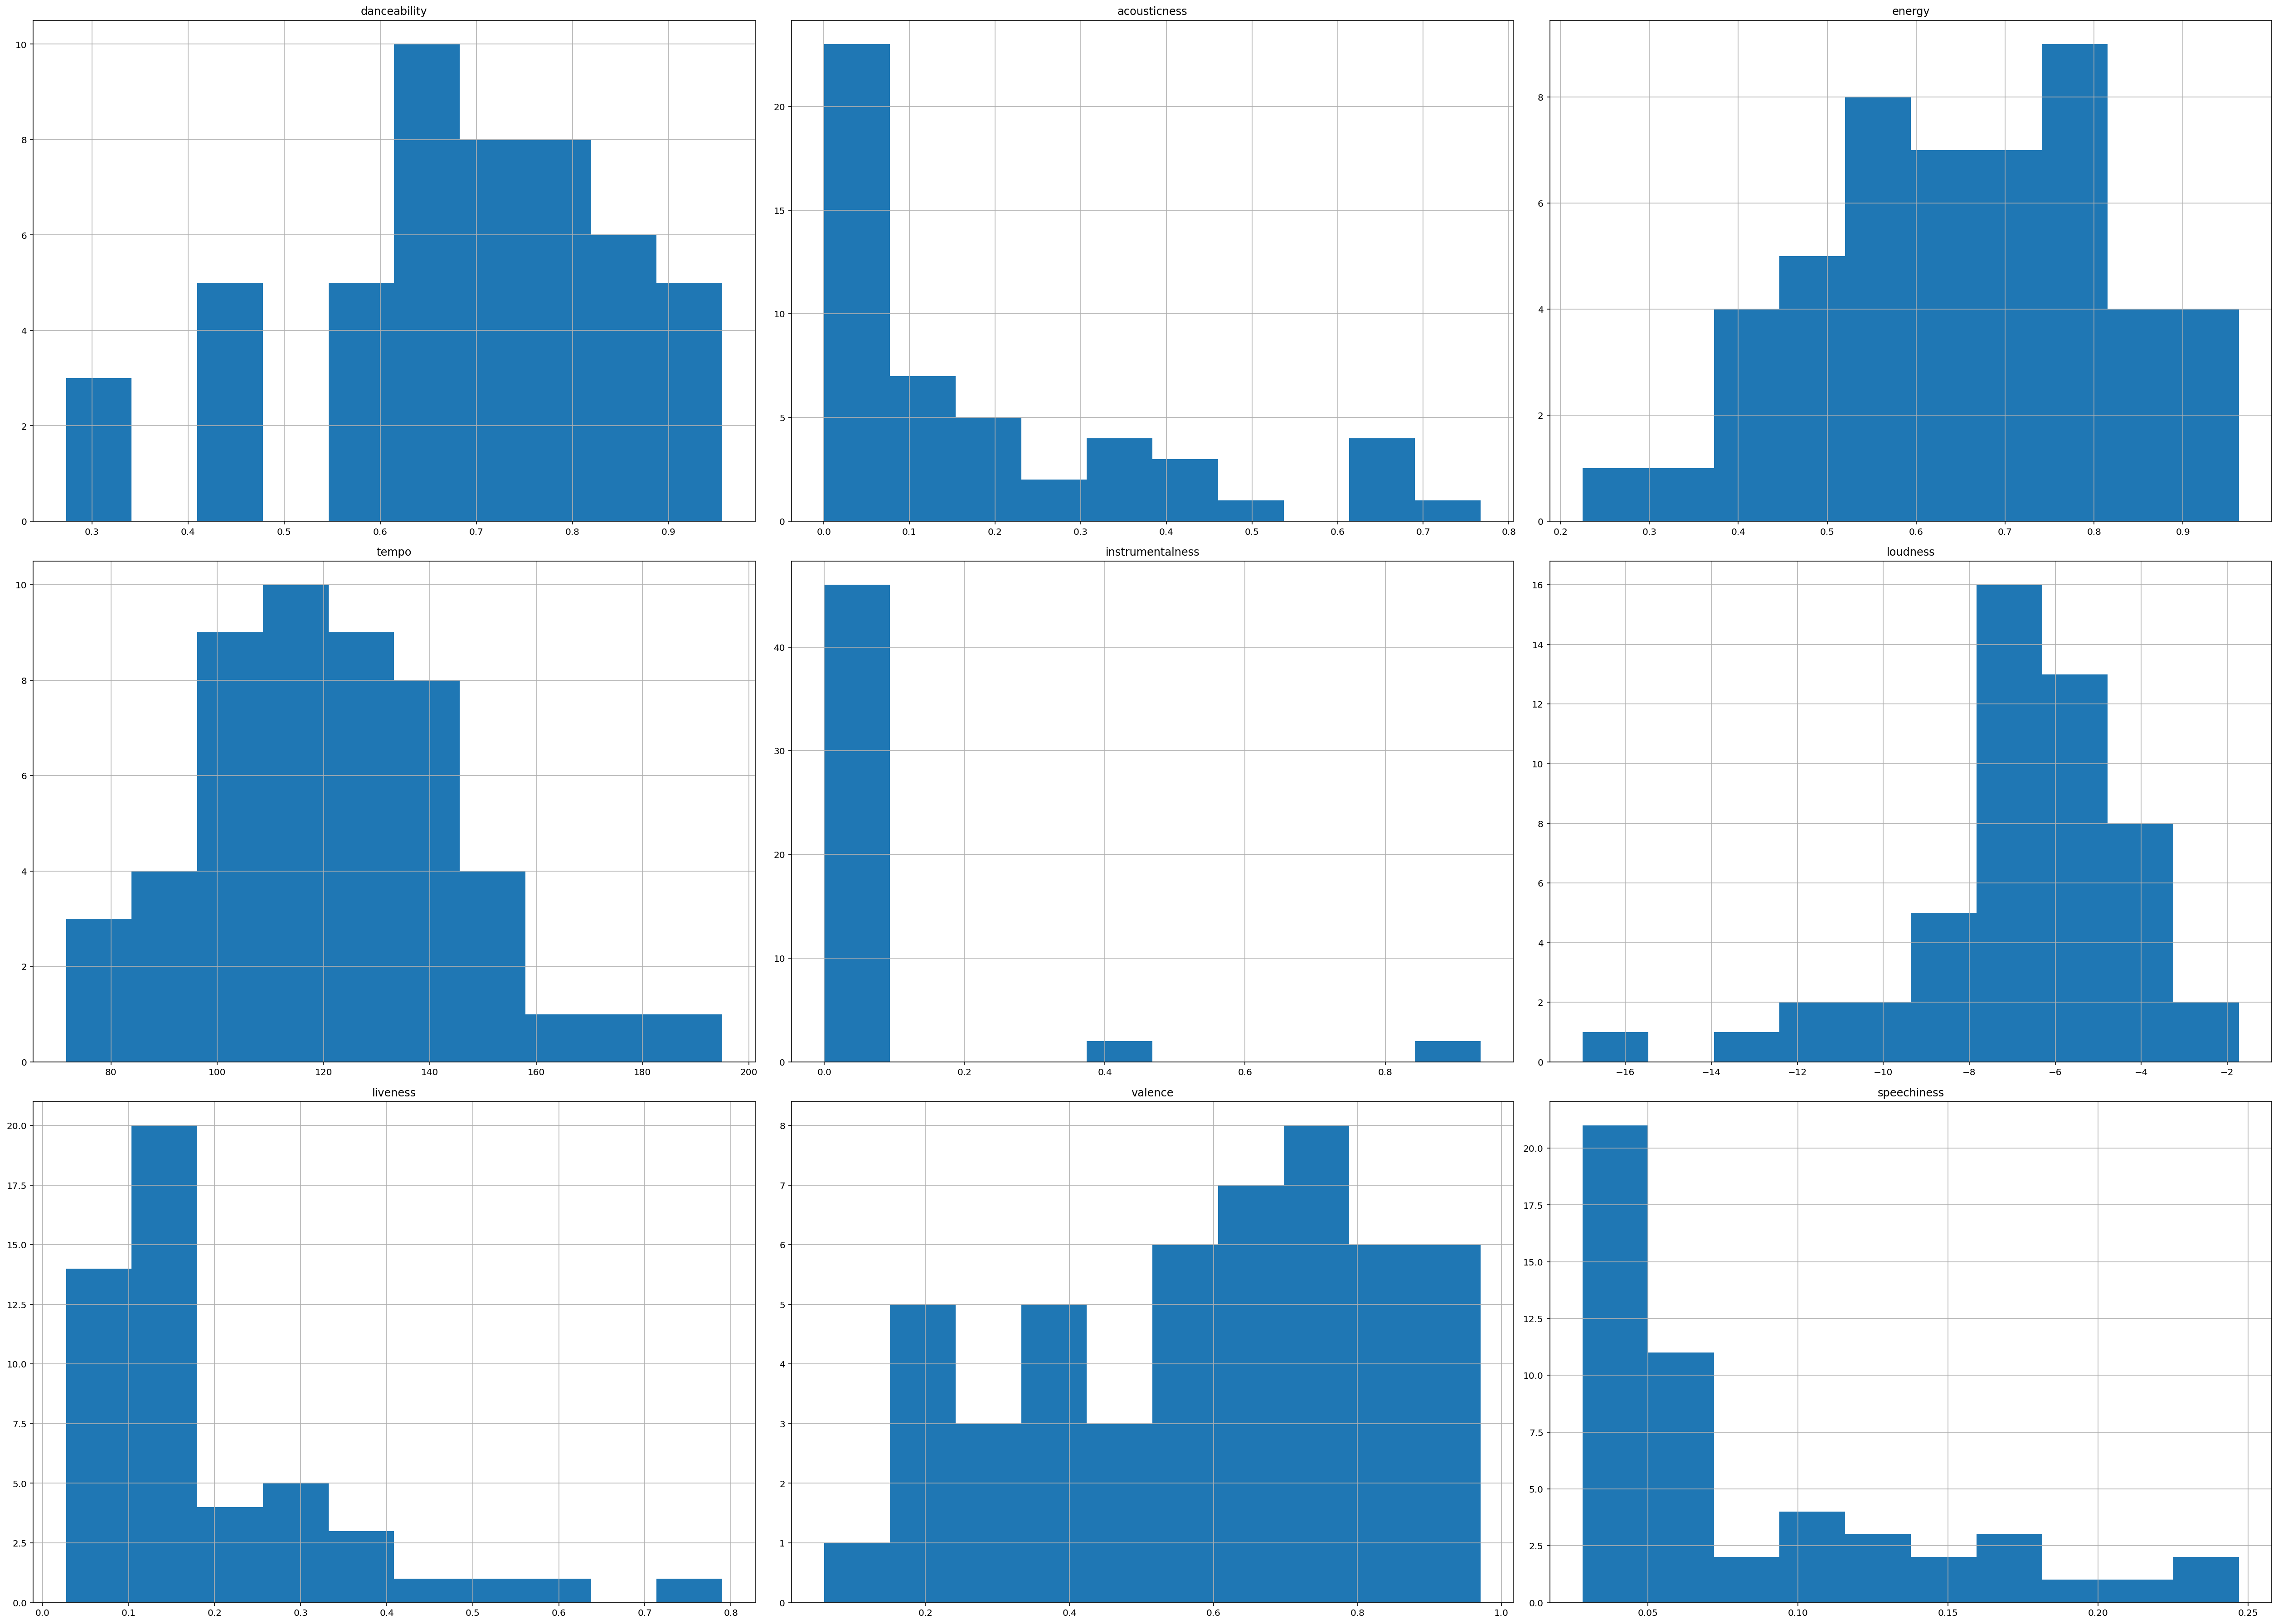

In [11]:
df_fav.hist(figsize=(35,25)) 
plt.tight_layout()
plt.show()



In [12]:
col_features = df_fav.columns[1:]
X = MinMaxScaler().fit_transform(df_fav[col_features])

In [13]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [14]:
df_fav['kmeans'] = kmeans.labels_

In [15]:
df_fav

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,valence,speechiness,kmeans
track_name,,,,,,,,,,,
Woman,6Uj1ctrBOjOas8xZXGqKk4,0.824,0.088800,0.764,107.998,0.002940,-4.175,0.1170,0.8810,0.0854,1
Daisy,0AUvWawuP0ibk4SQ3sIZjk,0.834,0.235000,0.663,121.876,0.000000,-6.143,0.3720,0.7740,0.1330,1
Buss It,25j0Sape7qZbq6ZPLFefTT,0.956,0.059300,0.502,110.003,0.000000,-5.995,0.2380,0.7950,0.2130,1
do re mi,6Se3x9ANMLv0dCDsjGmEjh,0.745,0.005220,0.593,111.001,0.000005,-6.350,0.1230,0.1700,0.0524,1
Roshni,4VDJJglEbqLva4mTz4ZnHV,0.566,0.629000,0.576,100.065,0.000000,-7.652,0.5340,0.3000,0.1210,0
MORE,6juLaduD4STCUDWT0AYun4,0.660,0.002570,0.787,142.018,0.000000,-4.592,0.3230,0.1990,0.0320,1
She Doesn't Mind,4odiyU3myG29Ld0wurMfE8,0.718,0.000624,0.776,120.015,0.000005,-5.208,0.2070,0.6220,0.0693,1
TALES OF DOMINICA,5S4PZ7AuYlYiVIVik3wHUf,0.742,0.629000,0.734,114.952,0.003140,-5.582,0.0834,0.5410,0.0407,1
Blueberry Faygo,22LAwLoDA5b4AaGSkg6bKW,0.774,0.207000,0.554,99.034,0.000000,-7.909,0.1320,0.3490,0.0383,1


Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

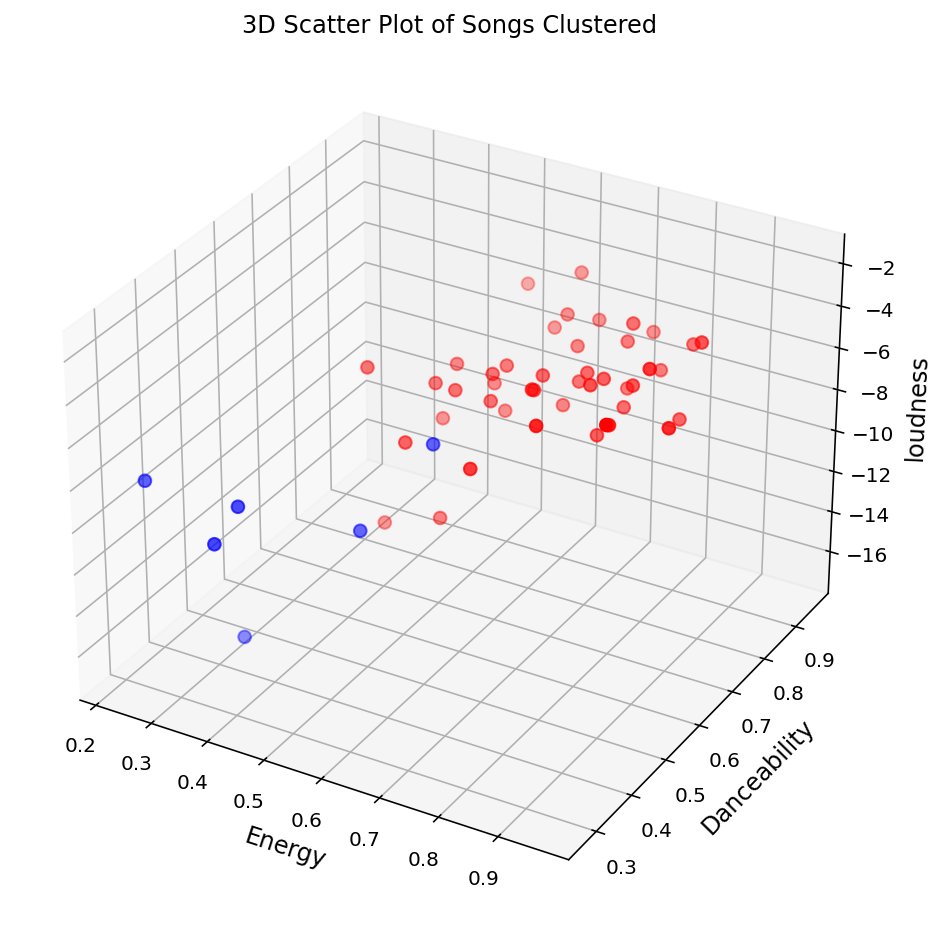

In [16]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df_fav['energy']
y = df_fav['danceability']
z = df_fav['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df_fav['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")


In [17]:
df_fav.groupby(['kmeans']).mean()

,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,valence,speechiness
kmeans,,,,,,,,,
0,0.399833,0.520550,0.402833,101.166333,0.301748,-10.371833,0.203167,0.200250,0.049417
1,0.726568,0.143862,0.689841,124.688250,0.020638,-6.232682,0.191568,0.645955,0.084727


In [18]:
cluster_0 = df_fav[df_fav['kmeans']==0]
cluster_1  = df_fav[df_fav['kmeans']==1]

In [19]:
cluster_0 #AKA soothing vibes onli!

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,valence,speechiness,kmeans
track_name,,,,,,,,,,,
Roshni,4VDJJglEbqLva4mTz4ZnHV,0.566,0.6290,0.576,100.065,0.00000,-7.652,0.534,0.3000,0.1210,0
The 2nd Law: Isolated System,4nr4gSTFGmTTSbumSY3kfH,0.471,0.6780,0.509,131.996,0.93600,-10.900,0.175,0.0595,0.0367,0
Bella Toscana,4itWB8OxjqYgdh95WHVSsx,0.327,0.0213,0.393,120.651,0.00000,-8.501,0.118,0.1840,0.0328,0
On The Banks Of The Arno,1RBySFOL70ow6YJloy7sxP,0.273,0.3890,0.388,71.523,0.00000,-9.487,0.157,0.1870,0.0412,0
Happier Than Ever,4RVwu0g32PAqgUiJoXsdF8,0.332,0.7670,0.225,81.055,0.00349,-8.697,0.128,0.2970,0.0348,0
Bellissima Francesca,0Ei7YoeKcwbz0Wdt1g5wTW,0.430,0.6390,0.326,101.708,0.87100,-16.994,0.107,0.1740,0.0300,0


## Create the new playlist(s)

In [20]:
def create_playlist(sp, username, playlist_name, playlist_description):
    playlists = sp.user_playlist_create(username, playlist_name, description = playlist_description)
    
    

In [21]:
scope = 'playlist-modify-public'
username = "bzo14hlkd2xdt5odh1fjzppnk"
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)
if token:
    sp = spotipy.Spotify(auth=token)
    print("yas")
else:
    print("Can't get token for", username)
    
    

yas


In [22]:
token


'BQDXdIu1SwLWhMQK1DbvtMlyMyb9HliJR68dHnOqjTR4EK6JZiuOBsHQvpq_LNcmcxrNxfB-IcEtnm6lCOvAH1Vm5ecyCPH_G2S7fjMiIFXSskRKiPO8EDhDxW1ocdcwf2mH5yU1vo0VUrs9XSItKgIn9erkB79peC5H8cplKdzS68cguXfLZ6MSWNG3ARLpCKUcCAT102UdGmfAu9eIqhTGOS7jNkWLZYs0G-8HK-378NQ'

In [43]:
create_playlist(sp, username, 'DJ Python', 'Soothing-vibes playlist created using sklearn clustering!')


In [44]:
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists



In [46]:
fetch_playlists(sp,username)



,id,name,#tracks
0,4TtPTzQAd0LTTE03z5RZbB,DJ Python,0
1,3xu2NB7Zotp8oxwuK4ehR2,ML-chosen,50
2,37i9dQZF1DZ06evO49YTXz,This Is Ritviz,26
3,2Qp7Gl62EJEBfh5LTJRSpl,Lofi Butter Study Beats ☁️ Chill Focus Beats,528
4,37i9dQZF1DX70RN3TfWWJh,Workout,100


In [39]:
def enrich_playlist(sp, username, playlist_id, playlist_tracks):
    index = 0
    results = []
    
    while index < len(playlist_tracks):
        print(playlist_tracks[index:index + len(list_track)])
        results += sp.user_playlist_add_tracks(username, playlist_id, tracks = playlist_tracks[index:index + len(list_track)])
        index += len(list_track)
        

In [47]:
list_track = cluster_0['track_id'].values


In [48]:
list_track

array(['4VDJJglEbqLva4mTz4ZnHV', '4nr4gSTFGmTTSbumSY3kfH',
       '4itWB8OxjqYgdh95WHVSsx', '1RBySFOL70ow6YJloy7sxP',
       '4RVwu0g32PAqgUiJoXsdF8', '0Ei7YoeKcwbz0Wdt1g5wTW'], dtype=object)

In [49]:
enrich_playlist(sp, username, '4TtPTzQAd0LTTE03z5RZbB', list_track)


['4VDJJglEbqLva4mTz4ZnHV' '4nr4gSTFGmTTSbumSY3kfH'
 '4itWB8OxjqYgdh95WHVSsx' '1RBySFOL70ow6YJloy7sxP'
 '4RVwu0g32PAqgUiJoXsdF8' '0Ei7YoeKcwbz0Wdt1g5wTW']


In [52]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Fetch the Featured Playlists


In [32]:
response = sp.featured_playlists()
# check the format of the data 
response

{'message': 'Pilihan Editor',
 'playlists': {'href': 'https://api.spotify.com/v1/browse/featured-playlists?timestamp=2022-02-23T11%3A33%3A45&offset=0&limit=20',
  'items': [{'collaborative': False,
    'description': 'The hits of tomorrow are on Spotify today. Cover: Dove Cameron',
    'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWUa8ZRTfalHk'},
    'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWUa8ZRTfalHk',
    'id': '37i9dQZF1DWUa8ZRTfalHk',
    'images': [{'height': None,
      'url': 'https://i.scdn.co/image/ab67706f00000003b7f4f4a94532c90e5a1574b0',
      'width': None}],
    'name': 'Pop Rising',
    'owner': {'display_name': 'Spotify',
     'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
     'href': 'https://api.spotify.com/v1/users/spotify',
     'id': 'spotify',
     'type': 'user',
     'uri': 'spotify:user:spotify'},
    'primary_color': None,
    'public': None,
    'snapshot_id': 'MTY0NTU3ODUwNywwMDAwMDVhYzAwM

In [33]:
# Let's untangle the data
print(response['message'])
playlists = response['playlists']
# For looping through the API request
for i, item in enumerate(playlists['items']):
    print('no: {},Name: {},id: {}, description: {}, total tracks: {}'.
          format(playlists['offset'] + i, item['name'], item['id'],item['description'], item['tracks']['total']))
if playlists['next']:
    response = sp.next(playlists)
else:
    response = None

Pilihan Editor
no: 0,Name: Pop Rising,id: 37i9dQZF1DWUa8ZRTfalHk, description: The hits of tomorrow are on Spotify today. Cover: Dove Cameron, total tracks: 86
no: 1,Name: Work From Home,id: 37i9dQZF1DWTLSN7iG21yC, description: Clock in from the comfort of your own home with 8 hours of music to carry you through the day., total tracks: 150
no: 2,Name: A Perfect Day,id: 37i9dQZF1DWSXBu5naYCM9, description: Timeless melodies from your favourite artists, both old and new., total tracks: 70
no: 3,Name: Music For Concentration,id: 37i9dQZF1DX3PFzdbtx1Us, description: Minimalism, electronica and modern classical to concentrate to., total tracks: 90
no: 4,Name: Lorem,id: 37i9dQZF1DXdwmD5Q7Gxah, description: we are so lucky for these beautiful tracks of the week. cover: omar apollo & daniel caesar, total tracks: 148
no: 5,Name: Chill Pop,id: 37i9dQZF1DX0MLFaUdXnjA, description: Keep it low-key with all of today's chill pop. Cover: Maude Latour, total tracks: 100
no: 6,Name: Workday Lounge,id: 

Once the data strucutre is sorted, next step is to convert this API call into a data frame

In [44]:
def featured_playlists(sp):
    id = []
    name = []
    num_tracks = []
 # For looping through the API request  
    response = sp.featured_playlists()
    playlists = response['playlists']
    for i, items in enumerate(playlists['items']):
        id.append(items['id'])
        name.append(items['name'])
        num_tracks.append(items['tracks']['total'])

# Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [45]:
df_playlists = featured_playlists(sp)
df_playlists

,id,name,#tracks
0,37i9dQZF1DWUa8ZRTfalHk,Pop Rising,86
1,37i9dQZF1DWTLSN7iG21yC,Work From Home,150
2,37i9dQZF1DWSXBu5naYCM9,A Perfect Day,70
3,37i9dQZF1DX3PFzdbtx1Us,Music For Concentration,90
4,37i9dQZF1DXdwmD5Q7Gxah,Lorem,148
5,37i9dQZF1DX0MLFaUdXnjA,Chill Pop,100
6,37i9dQZF1DWT5lkChsPmpy,Workday Lounge,222
7,37i9dQZF1DX4pUKG1kS0Ac,Guilty Pleasures,150
8,37i9dQZF1DXbYM3nMM0oPk,Mega Hit Mix,75
9,37i9dQZF1DX4dyzvuaRJ0n,mint,99


## Obtain the tracks from the playlists

In [46]:
def fetch_playlist_tracks(sp, playlistsid): 
    offset = 0
    tracks = []
    # Make the API request
    while True:
            content = sp.playlist_tracks( playlistsid, fields=None, limit=100, offset=offset, market=None)
            tracks += content['items']
        
            if content['next'] is not None:
                offset += 100
            else:
                break
    
    track_id = []
    track_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name'])
    
# Create the final df
    df_playlists_tracks = pd.DataFrame({"track_id":track_id, "track_name": track_name})
    return df_playlists_tracks

In [47]:
# Test the function
fetch_playlist_tracks(sp,'37i9dQZF1DXdd3gw5QVjt9')

,track_id,track_name
0,1MOFKCK1YJ07K4dVvjJCKM,Wish List
1,1zeQjPT367QcGrkpIXYjuW,Wouldn't Come Back
2,02luPTpNqPs0Ht5PUswdDT,Yours and Mine (Acoustic)
3,5Mz9lPPBzEspDIvv5ihVky,In Agreement
4,7GoxuKPMDqKRa1QEIIPXHR,Boys
...,...,...
85,2icih9ttMWVZCIJRHmdUA0,Persephone
86,6OxJnldrDT2GFcsSajBHgt,Until We Get There
87,68i6MdF0uPSiUAOqY7r0fr,Howl
88,43zbl1HtPGmdXktjOzRFXX,Call the Days


## Function to fetch the audio features from the songs of given playlist

In [60]:
def fetch_audio_features(sp, playlist_id):
    playlist = fetch_playlist_tracks(sp, playlist_id)
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    # Create an empty list to feed in different charactieritcs of the tracks
    features_list = []
    #Create keys-values of empty lists inside nested dictionary for album
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['acousticness'],
                              features['energy'], 
                              features['tempo'],
                              features['instrumentalness'], 
                              features['loudness'],
                              features['liveness'],
                              features['duration_ms'],
                              features['key'],
                              features['valence'],
                              features['speechiness']
                             ])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'acousticness', 'energy','tempo', 
                                                             'instrumentalness', 'loudness', 'liveness', 'duration_ms', 'key',
                                                             'valence', 'speechiness'])
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_name', inplace=True, drop=True)
    return df_playlist_audio_features

In [61]:
# Build the dtaframe froms the playlists
for i, playlist in enumerate(df_playlists['id']):
    try:
        string_command = "df_{} = fetch_audio_features(sp, playlist)".format(playlist)
        print("Create {}".format(string_command))
        exec(string_command)
    except:
        print("playlist with id {} is not valid, skiping ".format(playlist))
        pass

Create df_37i9dQZF1DWUa8ZRTfalHk = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DWTLSN7iG21yC = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DWSXBu5naYCM9 = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX3PFzdbtx1Us = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DXdwmD5Q7Gxah = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX0MLFaUdXnjA = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DWT5lkChsPmpy = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX4pUKG1kS0Ac = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DXbYM3nMM0oPk = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX4dyzvuaRJ0n = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DXbTxeAdrVG2l = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DWY8U6Zq7nvbE = fetch_audio_features(sp, playlist)


In [66]:
def fetch_audio_features_mean(sp, playlist_id):
    Playlist = fetch_audio_features(sp, playlist_id)
    return pd.DataFrame(Playlist.mean(), columns= [playlist_id])

In [67]:
# Test the function
df = fetch_audio_features_mean(sp, '37i9dQZF1DX0MLFaUdXnjA')
df.head(10)

/var/folders/td/70hft4bj3q357zc7dlsyc6w40000gn/T/ipykernel_19999/3646382290.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return pd.DataFrame(Playlist.mean(), columns= [playlist_id])


,37i9dQZF1DX0MLFaUdXnjA
danceability,0.593170
acousticness,0.556644
energy,0.424134
tempo,116.018270
instrumentalness,0.019801
loudness,-9.107740
liveness,0.157121
duration_ms,189520.840000
key,4.320000
valence,0.359655


In [68]:
# Merge them together
dataframes = []
# Loop through the filenames to populate dataframes with different dataframes 
for  i in df_playlists['id']:
    dataframes.append(fetch_audio_features_mean(sp, i))

/var/folders/td/70hft4bj3q357zc7dlsyc6w40000gn/T/ipykernel_19999/3646382290.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return pd.DataFrame(Playlist.mean(), columns= [playlist_id])
/var/folders/td/70hft4bj3q357zc7dlsyc6w40000gn/T/ipykernel_19999/3646382290.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return pd.DataFrame(Playlist.mean(), columns= [playlist_id])
/var/folders/td/70hft4bj3q357zc7dlsyc6w40000gn/T/ipykernel_19999/3646382290.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling t

In [69]:
dataframes

[                  37i9dQZF1DWUa8ZRTfalHk
 danceability                    0.624302
 acousticness                    0.267611
 energy                          0.630970
 tempo                         128.189267
 instrumentalness                0.005633
 loudness                       -6.547709
 liveness                        0.170094
 duration_ms                183738.941860
 key                             5.651163
 valence                         0.524791
 speechiness                     0.078013,
                   37i9dQZF1DWTLSN7iG21yC
 danceability                    0.660680
 acousticness                    0.188517
 energy                          0.648867
 tempo                         116.528927
 instrumentalness                0.001392
 loudness                       -5.955253
 liveness                        0.154769
 duration_ms                185763.666667
 key                             5.146667
 valence                         0.522654
 speechiness                     

## Some Machine Learning 
### Find the best suited feature

In [70]:
X = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True), dataframes)
X

,37i9dQZF1DWUa8ZRTfalHk,37i9dQZF1DWTLSN7iG21yC,37i9dQZF1DWSXBu5naYCM9,37i9dQZF1DX3PFzdbtx1Us,37i9dQZF1DXdwmD5Q7Gxah,37i9dQZF1DX0MLFaUdXnjA,37i9dQZF1DWT5lkChsPmpy,37i9dQZF1DX4pUKG1kS0Ac,37i9dQZF1DXbYM3nMM0oPk,37i9dQZF1DX4dyzvuaRJ0n,37i9dQZF1DXbTxeAdrVG2l,37i9dQZF1DWY8U6Zq7nvbE
danceability,0.624302,0.660680,0.611357,0.393424,0.621196,0.593170,0.669279,0.676867,0.699947,0.660242,0.670160,0.608720
acousticness,0.267611,0.188517,0.159481,0.964889,0.320933,0.556644,0.532177,0.147533,0.173821,0.067654,0.173612,0.751760
energy,0.630970,0.648867,0.709471,0.074201,0.575226,0.424134,0.345416,0.785073,0.683453,0.792162,0.735293,0.298689
tempo,128.189267,116.528927,113.792900,105.261000,122.872068,116.018270,115.904914,123.326367,117.226787,123.894434,116.098567,113.512480
instrumentalness,0.005633,0.001392,0.002356,0.884257,0.071228,0.019801,0.852532,0.015297,0.002053,0.187510,0.026699,0.000829
loudness,-6.547709,-5.955253,-5.704800,-23.158489,-7.912486,-9.107740,-14.350631,-5.908100,-5.407187,-5.802949,-7.205473,-9.731740
liveness,0.170094,0.154769,0.168556,0.119479,0.185476,0.157121,0.134709,0.188426,0.169543,0.164882,0.182424,0.133772
duration_ms,183738.941860,185763.666667,208047.700000,161059.844444,189871.418919,189520.840000,164679.495495,218487.280000,189870.653333,204913.838384,243185.126667,195177.470000
key,5.651163,5.146667,5.457143,4.811111,5.743243,4.320000,5.364865,5.053333,5.586667,6.414141,5.353333,5.560000
valence,0.524791,0.522654,0.552529,0.191376,0.473650,0.359655,0.300323,0.707133,0.592551,0.426106,0.647161,0.444280


In [71]:
Y = pd.DataFrame(df_fav.median(), columns= ['fav_playlist'])
Y= Y.drop('mode')
Y

/var/folders/td/70hft4bj3q357zc7dlsyc6w40000gn/T/ipykernel_19999/1319296212.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Y = pd.DataFrame(df_fav.median(), columns= ['fav_playlist'])


,fav_playlist
danceability,0.710500
acousticness,0.105000
energy,0.665000
tempo,120.350500
instrumentalness,0.000005
loudness,-6.377000
liveness,0.133500
duration_ms,190712.000000
key,6.000000
valence,0.622500


In [75]:
pip install sklearn.ensemble.forest

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
ERROR: Could not find a version that satisfies the requirement sklearn.ensemble.forest (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble.forest
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [76]:
# Analyze feature importances
from sklearn.ensemble import RandomForestRegressor
# Can combine step above with this
forest = RandomForestRegressor(random_state=42, max_depth=5, max_features=10) 
forest.fit(X,Y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature rankings
print("Playlist ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X.columns[f], 
            importances[indices[f]]))

Playlist ranking:
1. 37i9dQZF1DWUa8ZRTfalHk 0.111553 
2. 37i9dQZF1DWTLSN7iG21yC 0.110271 
3. 37i9dQZF1DWSXBu5naYCM9 0.110179 
4. 37i9dQZF1DX3PFzdbtx1Us 0.099710 
5. 37i9dQZF1DXdwmD5Q7Gxah 0.096209 
6. 37i9dQZF1DX0MLFaUdXnjA 0.080057 
7. 37i9dQZF1DWT5lkChsPmpy 0.077901 
8. 37i9dQZF1DX4pUKG1kS0Ac 0.070420 
9. 37i9dQZF1DXbYM3nMM0oPk 0.070105 
10. 37i9dQZF1DX4dyzvuaRJ0n 0.069813 
11. 37i9dQZF1DXbTxeAdrVG2l 0.063735 
12. 37i9dQZF1DWY8U6Zq7nvbE 0.040047 


/var/folders/td/70hft4bj3q357zc7dlsyc6w40000gn/T/ipykernel_19999/3501798437.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X,Y)


## Now we have ranking of top playlist, we can build playlist from top 2-3 of them

In [78]:
frames = [df_37i9dQZF1DWUa8ZRTfalHk, df_37i9dQZF1DWTLSN7iG21yC, df_37i9dQZF1DWSXBu5naYCM9]
df =pd.concat(frames)
df

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness
track_name,,,,,,,,,,,,
Boyfriend,59CfNbkERJ3NoTXDvoURjj,0.345,0.2320,0.612,179.773,0.000000,-6.543,0.1940,153000,7,0.232,0.0608
House On Fire,2iHsdUnmKGIuc9oRE3DfgJ,0.610,0.0245,0.747,150.088,0.000000,-4.543,0.1060,140803,2,0.439,0.1090
she's all i wanna be,0IuVhCflrQPMGRrOyoY5RW,0.614,0.0134,0.644,160.036,0.000007,-5.372,0.1170,206772,2,0.651,0.0426
Pray,2gbRKKSyW7e7vAkyvrJkte,0.588,0.7260,0.390,96.571,0.000013,-7.753,0.0965,146267,8,0.206,0.0578
Go,4VtRHZ4tBDHaWltVAytlLY,0.663,0.8800,0.251,90.272,0.000000,-9.870,0.0932,215000,6,0.528,0.0435
...,...,...,...,...,...,...,...,...,...,...,...,...
Cuts & Bruises,5NmloLVuEmbB0477xkgVt1,0.493,0.3440,0.648,177.892,0.000000,-7.138,0.0924,185849,1,0.452,0.0438
The Good,51lXsATkqtU3ScAuIvi94k,0.726,0.0653,0.564,107.979,0.000916,-6.760,0.2970,209893,0,0.443,0.0277
Soak Up,4soRSjciciKPQaR2ER6AXQ,0.475,0.0890,0.577,84.001,0.000016,-6.427,0.1410,192000,6,0.369,0.0253


In [79]:
df = df.set_index(['track_id'])
df

,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness
track_id,,,,,,,,,,,
59CfNbkERJ3NoTXDvoURjj,0.345,0.2320,0.612,179.773,0.000000,-6.543,0.1940,153000,7,0.232,0.0608
2iHsdUnmKGIuc9oRE3DfgJ,0.610,0.0245,0.747,150.088,0.000000,-4.543,0.1060,140803,2,0.439,0.1090
0IuVhCflrQPMGRrOyoY5RW,0.614,0.0134,0.644,160.036,0.000007,-5.372,0.1170,206772,2,0.651,0.0426
2gbRKKSyW7e7vAkyvrJkte,0.588,0.7260,0.390,96.571,0.000013,-7.753,0.0965,146267,8,0.206,0.0578
4VtRHZ4tBDHaWltVAytlLY,0.663,0.8800,0.251,90.272,0.000000,-9.870,0.0932,215000,6,0.528,0.0435
...,...,...,...,...,...,...,...,...,...,...,...
5NmloLVuEmbB0477xkgVt1,0.493,0.3440,0.648,177.892,0.000000,-7.138,0.0924,185849,1,0.452,0.0438
51lXsATkqtU3ScAuIvi94k,0.726,0.0653,0.564,107.979,0.000916,-6.760,0.2970,209893,0,0.443,0.0277
4soRSjciciKPQaR2ER6AXQ,0.475,0.0890,0.577,84.001,0.000016,-6.427,0.1410,192000,6,0.369,0.0253


In [80]:
# CO
Y= Y.squeeze('columns')

In [81]:
Y = Y.sort_index( axis=0, level=None, ascending=True, inplace=False, kind='quicksort')
Y

acousticness             0.105000
danceability             0.710500
duration_ms         190712.000000
energy                   0.665000
instrumentalness         0.000005
key                      6.000000
liveness                 0.133500
loudness                -6.377000
speechiness              0.055700
tempo                  120.350500
valence                  0.622500
Name: fav_playlist, dtype: float64

In [82]:
# Subtract mean of the favourite plalyist from the top 3 playlist 
df1= df.subtract(Y, axis='columns') 
df1

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
track_id,,,,,,,,,,,
59CfNbkERJ3NoTXDvoURjj,0.1270,-0.3655,-37712.0,-0.053,-0.000005,1.0,0.0605,-0.166,0.0051,59.4225,-0.3905
2iHsdUnmKGIuc9oRE3DfgJ,-0.0805,-0.1005,-49909.0,0.082,-0.000005,-4.0,-0.0275,1.834,0.0533,29.7375,-0.1835
0IuVhCflrQPMGRrOyoY5RW,-0.0916,-0.0965,16060.0,-0.021,0.000002,-4.0,-0.0165,1.005,-0.0131,39.6855,0.0285
2gbRKKSyW7e7vAkyvrJkte,0.6210,-0.1225,-44445.0,-0.275,0.000007,2.0,-0.0370,-1.376,0.0021,-23.7795,-0.4165
4VtRHZ4tBDHaWltVAytlLY,0.7750,-0.0475,24288.0,-0.414,-0.000005,0.0,-0.0403,-3.493,-0.0122,-30.0785,-0.0945
...,...,...,...,...,...,...,...,...,...,...,...
5NmloLVuEmbB0477xkgVt1,0.2390,-0.2175,-4863.0,-0.017,-0.000005,-5.0,-0.0411,-0.761,-0.0119,57.5415,-0.1705
51lXsATkqtU3ScAuIvi94k,-0.0397,0.0155,19181.0,-0.101,0.000911,-6.0,0.1635,-0.383,-0.0280,-12.3715,-0.1795
4soRSjciciKPQaR2ER6AXQ,-0.0160,-0.2355,1288.0,-0.088,0.000011,0.0,0.0075,-0.050,-0.0304,-36.3495,-0.2535


In [83]:
df1= df1.divide(Y, axis='columns') 
df1

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
track_id,,,,,,,,,,,
59CfNbkERJ3NoTXDvoURjj,1.209524,-0.514426,-0.197743,-0.079699,-1.000000,0.166667,0.453184,0.026031,0.091562,0.493745,-0.627309
2iHsdUnmKGIuc9oRE3DfgJ,-0.766667,-0.141450,-0.261698,0.123308,-1.000000,-0.666667,-0.205993,-0.287596,0.956912,0.247091,-0.294779
0IuVhCflrQPMGRrOyoY5RW,-0.872381,-0.135820,0.084211,-0.031579,0.364865,-0.666667,-0.123596,-0.157598,-0.235189,0.329749,0.045783
2gbRKKSyW7e7vAkyvrJkte,5.914286,-0.172414,-0.233048,-0.413534,1.432432,0.333333,-0.277154,0.215775,0.037702,-0.197585,-0.669076
4VtRHZ4tBDHaWltVAytlLY,7.380952,-0.066854,0.127354,-0.622556,-1.000000,0.000000,-0.301873,0.547750,-0.219031,-0.249924,-0.151807
...,...,...,...,...,...,...,...,...,...,...,...
5NmloLVuEmbB0477xkgVt1,2.276190,-0.306122,-0.025499,-0.025564,-1.000000,-0.833333,-0.307865,0.119335,-0.213645,0.478116,-0.273896
51lXsATkqtU3ScAuIvi94k,-0.378095,0.021816,0.100576,-0.151880,175.833977,-1.000000,1.224719,0.060060,-0.502693,-0.102796,-0.288353
4soRSjciciKPQaR2ER6AXQ,-0.152381,-0.331457,0.006754,-0.132331,2.050193,0.000000,0.056180,0.007841,-0.545781,-0.302030,-0.407229


In [84]:
# Add all the score 
df1['variation'] = df1.sum(axis=1)
# take the absoulte of the variatio
df1['variation'] = df1['variation'].abs()
df1

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,variation
track_id,,,,,,,,,,,,
59CfNbkERJ3NoTXDvoURjj,1.209524,-0.514426,-0.197743,-0.079699,-1.000000,0.166667,0.453184,0.026031,0.091562,0.493745,-0.627309,0.021534
2iHsdUnmKGIuc9oRE3DfgJ,-0.766667,-0.141450,-0.261698,0.123308,-1.000000,-0.666667,-0.205993,-0.287596,0.956912,0.247091,-0.294779,2.297538
0IuVhCflrQPMGRrOyoY5RW,-0.872381,-0.135820,0.084211,-0.031579,0.364865,-0.666667,-0.123596,-0.157598,-0.235189,0.329749,0.045783,1.398220
2gbRKKSyW7e7vAkyvrJkte,5.914286,-0.172414,-0.233048,-0.413534,1.432432,0.333333,-0.277154,0.215775,0.037702,-0.197585,-0.669076,5.970718
4VtRHZ4tBDHaWltVAytlLY,7.380952,-0.066854,0.127354,-0.622556,-1.000000,0.000000,-0.301873,0.547750,-0.219031,-0.249924,-0.151807,5.444011
...,...,...,...,...,...,...,...,...,...,...,...,...
5NmloLVuEmbB0477xkgVt1,2.276190,-0.306122,-0.025499,-0.025564,-1.000000,-0.833333,-0.307865,0.119335,-0.213645,0.478116,-0.273896,0.112283
51lXsATkqtU3ScAuIvi94k,-0.378095,0.021816,0.100576,-0.151880,175.833977,-1.000000,1.224719,0.060060,-0.502693,-0.102796,-0.288353,174.817330
4soRSjciciKPQaR2ER6AXQ,-0.152381,-0.331457,0.006754,-0.132331,2.050193,0.000000,0.056180,0.007841,-0.545781,-0.302030,-0.407229,0.249758


In [111]:
# Now we have the variation, we will take the songs with the least variation 
df2 = df1.nsmallest(50,'variation')
df2

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,variation
track_id,,,,,,,,,,,,
59CfNbkERJ3NoTXDvoURjj,1.209524,-0.514426,-0.197743,-0.079699,-1.000000,0.166667,0.453184,0.026031,0.091562,0.493745,-0.627309,0.021534
6tS1Fm9z3UKuLSxrinY3pC,1.028571,-0.131597,-0.118058,0.136842,-1.000000,-0.500000,0.138577,-0.088756,0.867145,0.012277,-0.306024,0.038977
7CAdT0HdiQNlt1C7xk2hep,1.847619,-0.279381,0.106003,0.142857,-1.000000,-0.666667,-0.228464,-0.076525,0.224417,0.080976,-0.204819,0.053985
4hPpVbbakQNv8YTHYaOJP4,-0.386667,-0.072484,-0.046604,-0.060150,-1.000000,-0.333333,3.359551,-0.646699,-0.192101,-0.268453,-0.289960,0.063099
78kygHp1dvW1kncYjBgbe1,-0.401905,0.066854,-0.252800,-0.066165,-1.000000,0.500000,-0.394007,0.259683,1.244165,-0.335699,0.477912,0.098038
5NmloLVuEmbB0477xkgVt1,2.276190,-0.306122,-0.025499,-0.025564,-1.000000,-0.833333,-0.307865,0.119335,-0.213645,0.478116,-0.273896,0.112283
472vIK1ldetTxRxG3ovaiY,1.238095,0.052780,-0.242140,-0.171429,-1.000000,0.833333,-0.108614,-0.040301,-0.373429,-0.136248,0.060241,0.112288
5r43qanLhUCdBj8HN3fa6B,0.304762,-0.019001,-0.140825,0.315789,-1.000000,-0.166667,1.097378,-0.275365,-0.389587,0.163842,0.243373,0.133701
5r43qanLhUCdBj8HN3fa6B,0.304762,-0.019001,-0.140825,0.315789,-1.000000,-0.166667,1.097378,-0.275365,-0.389587,0.163842,0.243373,0.133701
